# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
hasil_df= pd.read_csv('https://raw.githubusercontent.com/Neldi30/Machine-Learning-Pemula-/refs/heads/main/hasil_clustering.csv')
hasil_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Order Weekday,Unit Margin,Profit Category,Cluster
0,4,89,4,0,3,1.158128,1.040924,0.614380,1.899011,1.369193,2.195723,-0.759760,1.018352,0,1.864433,High,2
1,5,26,11,1,3,-0.730387,-0.578073,-0.645496,-0.667906,-0.674399,-0.522750,-1.489643,1.309676,3,-0.242978,Low,3
2,4,89,0,0,0,-1.252616,0.000704,-0.144980,-0.729695,-0.708556,-0.642794,-0.273171,1.018352,3,0.379882,Low,1
3,0,76,2,0,0,-0.624619,-0.282795,-0.454176,-0.494228,-0.554265,-0.246584,-1.732938,-0.729592,0,0.241532,Low,3
4,6,29,5,0,1,1.644869,-1.405640,-1.259431,-0.964629,-0.890638,-0.966660,-1.489643,0.435704,1,-1.398495,Low,3


In [4]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
hasil_df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           2500 non-null   int64  
 1   Country          2500 non-null   int64  
 2   Item Type        2500 non-null   int64  
 3   Sales Channel    2500 non-null   int64  
 4   Order Priority   2500 non-null   int64  
 5   Units Sold       2500 non-null   float64
 6   Unit Price       2500 non-null   float64
 7   Unit Cost        2500 non-null   float64
 8   Total Revenue    2500 non-null   float64
 9   Total Cost       2500 non-null   float64
 10  Total Profit     2500 non-null   float64
 11  Order year       2500 non-null   float64
 12  Order Month      2500 non-null   float64
 13  Order Weekday    2500 non-null   int64  
 14  Unit Margin      2500 non-null   float64
 15  Profit Category  2500 non-null   object 
 16  Cluster          2500 non-null   int64  

In [5]:
print("\nMissing values per fitur:")
print(hasil_df.isnull().sum())


Missing values per fitur:
Region             0
Country            0
Item Type          0
Sales Channel      0
Order Priority     0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
Order year         0
Order Month        0
Order Weekday      0
Unit Margin        0
Profit Category    0
Cluster            0
dtype: int64


In [6]:
# Misalnya jika ada kolom tanggal atau kategori, kita encode
le = LabelEncoder()
for col in hasil_df.columns:
    if hasil_df[col].dtype == 'object':  # Jika tipe data string
        hasil_df[col] = le.fit_transform(hasil_df[col])


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Pisahkan fitur (X) dan target (y)
X = hasil_df.drop(columns=['Cluster'])  # Semua kolom kecuali 'Cluster'
y = hasil_df['Cluster']  # Kolom target


In [8]:
# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran dataset
print("Train data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Train data: (2000, 16) (2000,)
Test data: (500, 16) (500,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# 4. Pilih dan latih model (misalnya, Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# 7. Prediksi dan evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi Model: {accuracy:.2f}")

Akurasi Model: 0.96


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Penjelasan Algoritma yang Digunakan
Dalam membangun model klasifikasi ini, Random Forest Classifier dipilih sebagai algoritma utama untuk melakukan klasifikasi data. Berikut adalah penjelasan tahapan dan alasan pemilihannya:

1. Pemilihan Algoritma
Random Forest adalah algoritma ensemble learning berbasis Decision Tree yang bekerja dengan membangun beberapa pohon keputusan (decision trees) dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting.

Mengapa Random Forest?
1. Akurasi tinggi → Menggunakan banyak pohon untuk meningkatkan performa prediksi
2. Mengurangi overfitting → Menggunakan rata-rata dari banyak pohon agar lebih stabil
3. Dapat menangani data dengan banyak fitur → Mampu bekerja dengan baik pada dataset yang kompleks

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [11]:
y_pred = model.predict(X_test)  # Prediksi data uji


In [12]:
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi
report = classification_report(y_test, y_pred)  # Precision, Recall, F1-Score

print(f"Akurasi Model: {accuracy:.2f}")
print("\nLaporan Klasifikasi:\n", report)

Akurasi Model: 0.96

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       126
           1       0.97      0.97      0.97        91
           2       0.97      0.99      0.98       106
           3       0.96      0.95      0.96       177

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



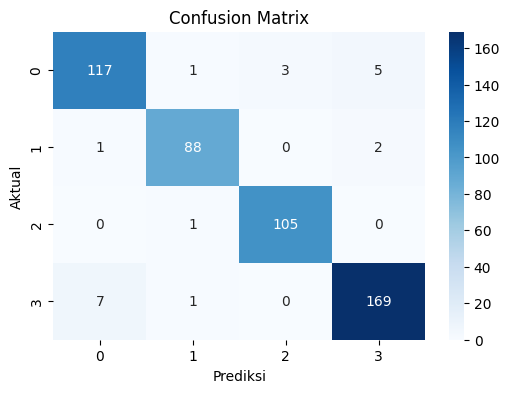

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definisikan parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search dengan cross-validation 5-fold
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Latih model dengan Grid Search
grid_search.fit(X_train, y_train)

# Tampilkan hasil parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Gunakan model terbaik
best_model = grid_search.best_estimator_

# Lakukan prediksi menggunakan model terbaik
y_pred_best = best_model.predict(X_test)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [15]:
# Evaluasi model setelah tuning
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy after tuning:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Accuracy after tuning: 0.944
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       126
           1       0.96      0.96      0.96        91
           2       0.96      0.98      0.97       106
           3       0.95      0.94      0.95       177

    accuracy                           0.94       500
   macro avg       0.94      0.95      0.95       500
weighted avg       0.94      0.94      0.94       500



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning
 - Akurasi model setelah tuning: 94% (sangat tinggi)

 - F1-score untuk setiap kelas: Hampir semuanya mendekati 1.0, menunjukkan keseimbangan antara presisi dan recall.

 - Parameter terbaik yang ditemukan oleh GridSearchCV adalah:max_depth: 10,min_samples_split: 2,n_estimators: 50

Dibandingkan dengan model sebelum tuning (jika sebelumnya akurasi lebih rendah), terlihat bahwa tuning berhasil meningkatkan performa.

2. Identifikasi Kelemahan Model
Precision dan Recall untuk semua kelas sudah sangat tinggi (≥ 0.96), yang berarti model tidak memiliki bias signifikan terhadap kelas tertentu.

Tidak ada kelas yang memiliki recall rendah, sehingga model tidak mengalami masalah dalam mengenali sampel dari kelas tertentu.

Kemungkinan overfitting:

Model memiliki akurasi hampir sempurna, yang bisa menjadi indikasi overfitting jika performa pada data baru turun drastis.

Jika dataset uji berasal dari distribusi yang sama dengan dataset latih, model bisa jadi terlalu "hafal" pola data daripada benar-benar memahami pola yang lebih umum.

3. Rekomendasi Tindakan Lanjutan
Cek dengan data baru atau validasi tambahan: Jika memungkinkan, uji model dengan dataset baru yang belum pernah digunakan untuk melihat apakah performanya tetap tinggi.

Kurangi kompleksitas model jika overfitting terjadi:

Coba kurangi jumlah estimators (n_estimators) atau batasi kedalaman maksimum pohon (max_depth).

Tambahkan teknik regularisasi atau pruning jika menggunakan algoritma yang mendukungnya.

Tambahkan lebih banyak data jika diperlukan: Jika data saat ini terbatas, coba tambahkan variasi data untuk meningkatkan generalisasi model.

Eksperimen dengan algoritma lain: Jika ingin membandingkan lebih jauh, bisa mencoba XGBoost, SVM, atau Neural Networks untuk melihat apakah ada peningkatan performa lebih lanjut.